<a href="https://colab.research.google.com/github/norayehia/TEXT-Classfication-svm-textblob/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()

In [ ]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

df=pd.read_csv('/content/drive/MyDrive/help/workong remote/data:run:py/datasets/lematxtblob2.csv')
#df.drop(['uniqueID'],axis =1,inplace=True)

df.head()


,review,Lemma,Polarityy,Analysiss,sentiment
0,"""It has no side effect, I take it in combinati...",side effect take combination Bystolic Mg Fis...,0.000000,Positive,1
1,"""My son is halfway through his fourth week of ...",son halfway fourth week Intuniv become conce...,0.129722,Positive,1
2,"""I used to take another oral contraceptive, wh...",use take another oral contraceptive pill cyc...,0.086080,Positive,1
3,"""This is my first time using any form of birth...",first time use form birth control glad go pa...,0.357143,Positive,1
4,"""Suboxone has completely turned my life around...",Suboxone completely turn life around feel he...,0.192333,Positive,1


**3clases**

In [ ]:
#df=pd.read_csv('/kaggle/input/drugbtextblob3/lematxtblob3.csv')
#df.drop(['uniqueID'],axis =1,inplace=True)

df.head()

,review,Lemma,Polarityy,Analysiss,sentiment
0,"""It has no side effect, I take it in combinati...",side effect take combination Bystolic Mg Fis...,0.000000,Positive,1
1,"""My son is halfway through his fourth week of ...",son halfway fourth week Intuniv become conce...,0.129722,Positive,1
2,"""I used to take another oral contraceptive, wh...",use take another oral contraceptive pill cyc...,0.086080,Positive,1
3,"""This is my first time using any form of birth...",first time use form birth control glad go pa...,0.357143,Positive,1
4,"""Suboxone has completely turned my life around...",Suboxone completely turn life around feel he...,0.192333,Positive,1


In [ ]:
df.shape

(215063, 5)

In [ ]:
df.describe()

,Polarityy,sentiment
count,215063.000000,215063.000000
mean,0.061684,0.663592
std,0.235168,0.472482
min,-1.000000,0.000000
25%,-0.051299,0.000000
50%,0.053125,1.000000
75%,0.179487,1.000000
max,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   review     215063 non-null  object 
 1   Lemma      215063 non-null  object 
 2   Polarityy  215063 non-null  float64
 3   Analysiss  215063 non-null  object 
 4   sentiment  215063 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 8.2+ MB


# EDA AND DATA VISUALIZATION:

In [ ]:
# Missing values
df.isnull().sum()

review       0
Lemma        0
Polarityy    0
Analysiss    0
sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()

86585

# MODEL BUILDING:

**//////////////////////////////////////////////////////**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["Lemma"], df['sentiment'], test_size=0.1, random_state=0,stratify=df['sentiment'])

**////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have X_train and X_test as your training and test data

# Choose the maximum number of features you want to include
max_features = 5000  # Adjust this value based on your data and experiment

# Create the TfidfVectorizer with specified parameters, including max_features
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english", ngram_range=(1, 2), max_features=max_features)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import sklearn
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
svm_clf = Pipeline([

 ("scaler", StandardScaler(with_mean=False)),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ])


In [ ]:
svm_clf.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
y_pred22 = svm_clf.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred22))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7235
           1       0.91      0.92      0.91     14272

    accuracy                           0.88     21507
   macro avg       0.87      0.87      0.87     21507
weighted avg       0.88      0.88      0.88     21507



In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 6112,  1123],
       [  584, 13688]])

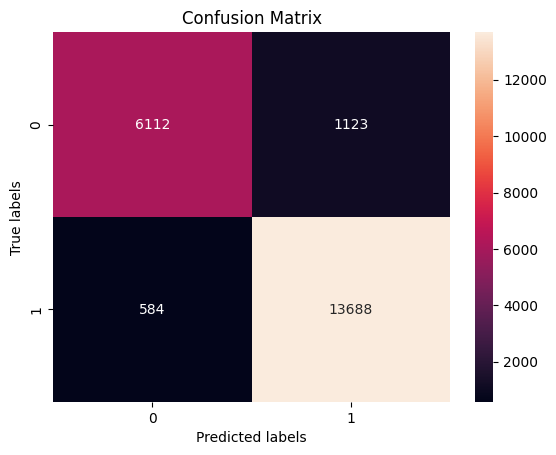

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');